In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv(r"C:\Users\uppada satwik\Downloads\Online+Retail.csv", encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
data['sales'] = data['UnitPrice'] * data['Quantity']

In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France,14.85


In [5]:
monetary = data.groupby('CustomerID')['sales'].sum().reset_index()
monetary

,CustomerID,sales
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [6]:
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [7]:
data1 = data.copy()

data1 = data1[data1.InvoiceDate != '07-03-']
data1['InvoiceDate'] =pd.to_datetime(data1['InvoiceDate'],format='mixed')

In [8]:
data1['recency']=(pd.to_datetime('2024-03-24')-pd.to_datetime(data1['InvoiceDate'])).dt.days

In [9]:
recency=data1.groupby(['CustomerID'])['recency'].min().reset_index()

In [10]:
data_cluster=recency.merge(frequency,on='CustomerID').merge(monetary,on='CustomerID')

In [11]:
data_cluster

,CustomerID,recency,InvoiceNo,sales
0,12346.0,4813,2,0.00
1,12347.0,4527,7,4310.00
2,12348.0,4563,4,1797.24
3,12349.0,4506,1,1757.55
4,12350.0,4798,1,334.40
...,...,...,...,...
4367,18280.0,4647,1,180.60
4368,18281.0,4491,1,80.82
4369,18282.0,4580,3,176.60
4370,18283.0,4497,16,2094.88


In [12]:
data_cluster.isnull().sum()

CustomerID    0
recency       0
InvoiceNo     0
sales         0
dtype: int64

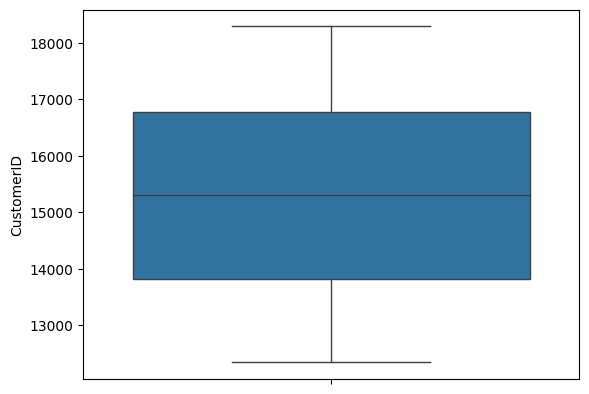

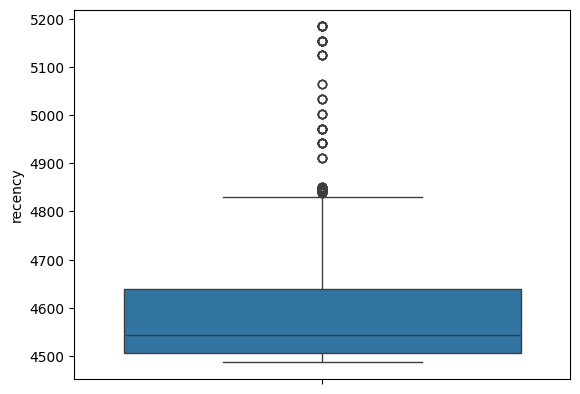

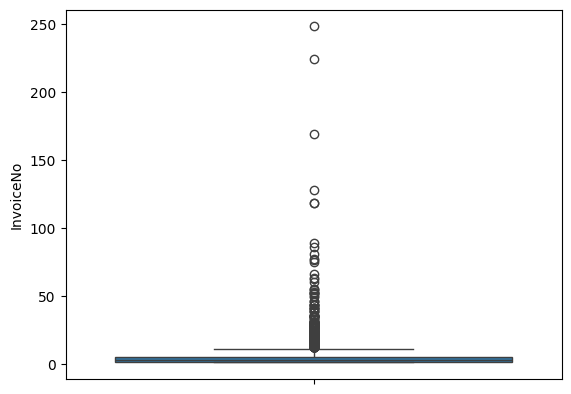

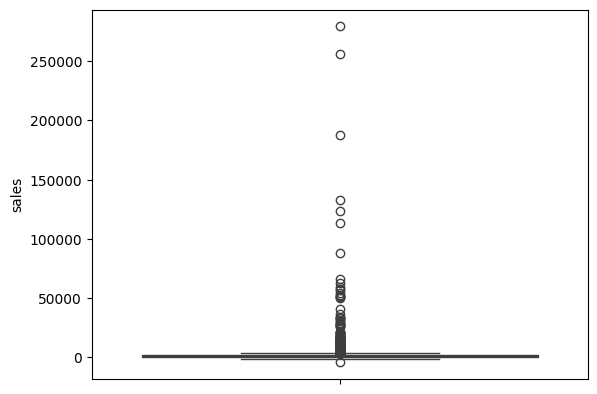

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in data_cluster.columns:
  sns.boxplot(data_cluster[i])
  plt.show()

In [14]:
data_cluster.describe()

,CustomerID,recency,InvoiceNo,sales
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,4587.987420,5.075480,1898.459701
std,1722.390705,113.931649,9.338754,8219.345141
min,12346.000000,4487.000000,1.000000,-4287.630000
25%,13812.750000,4507.000000,1.000000,293.362500
50%,15300.500000,4544.000000,3.000000,648.075000
75%,16778.250000,4639.000000,5.000000,1611.725000
max,18287.000000,5184.000000,248.000000,279489.020000


In [15]:
data_cluster.rename(columns={"InvoiceNo":"frequency"},inplace=True)

In [16]:
data_cluster

,CustomerID,recency,frequency,sales
0,12346.0,4813,2,0.00
1,12347.0,4527,7,4310.00
2,12348.0,4563,4,1797.24
3,12349.0,4506,1,1757.55
4,12350.0,4798,1,334.40
...,...,...,...,...
4367,18280.0,4647,1,180.60
4368,18281.0,4491,1,80.82
4369,18282.0,4580,3,176.60
4370,18283.0,4497,16,2094.88


C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_4472\596417731.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cluster[x] , bins=10)
C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_4472\596417731.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cluster[x] , bins=10)
C:\U

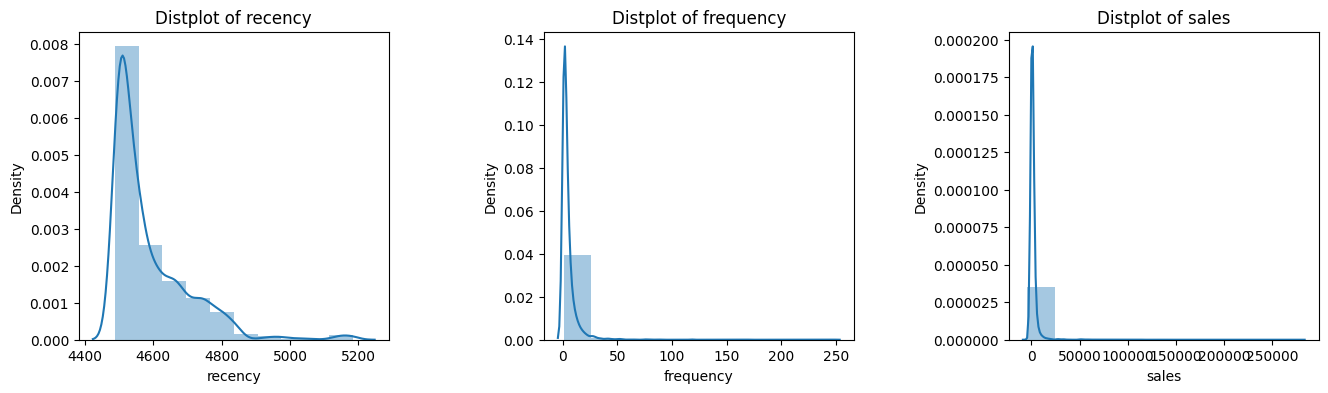

In [17]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['recency'	,'frequency','sales']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(data_cluster[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

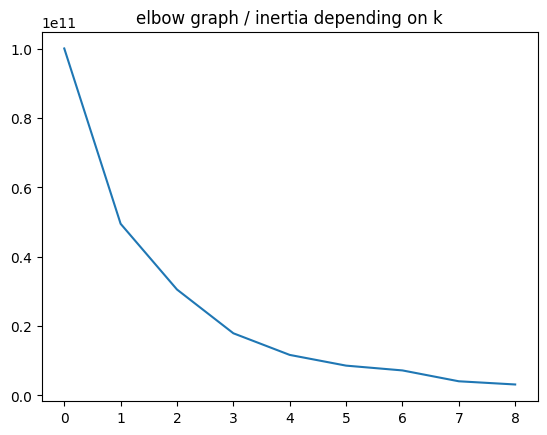

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = data_cluster.drop('CustomerID',axis=1)
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot( km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

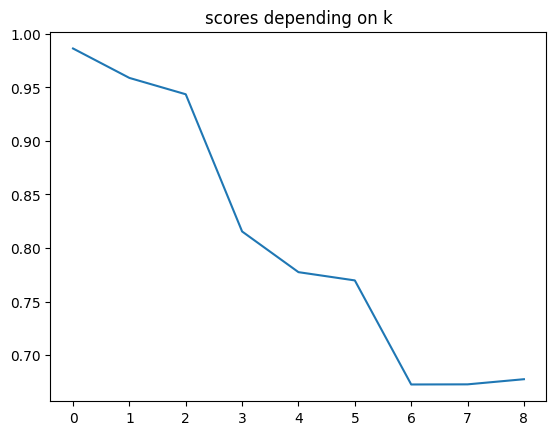

In [19]:
sns.lineplot( km_scores)
plt.title('scores depending on k')
plt.show()

In [20]:
km = KMeans(n_clusters=3).fit(X)

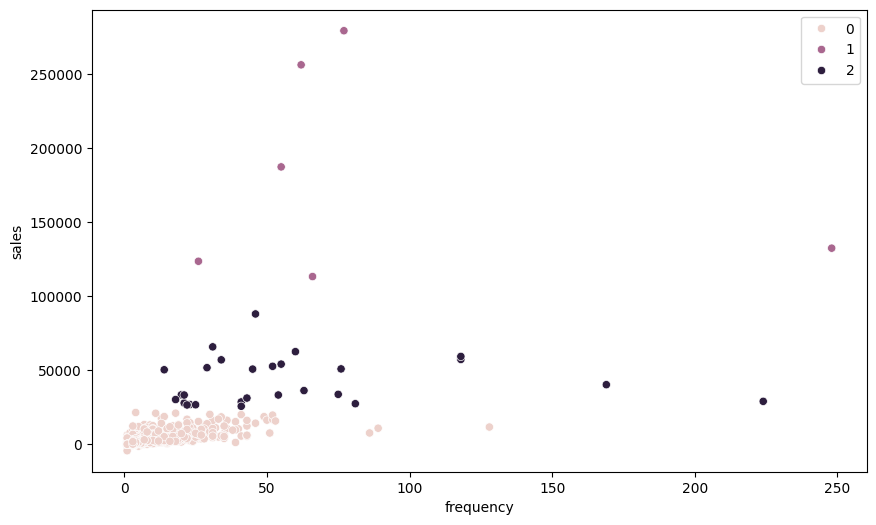

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=km.labels_)
plt.show()

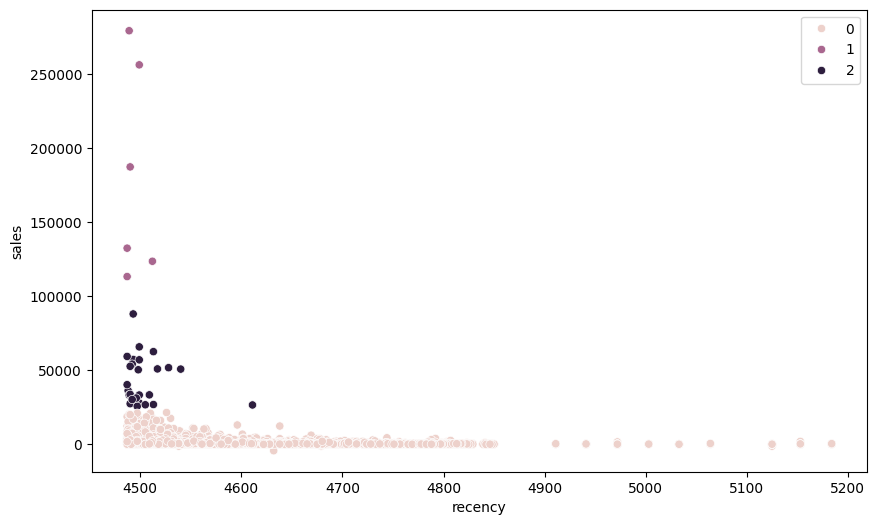

In [22]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], hue=km.labels_)
plt.show()

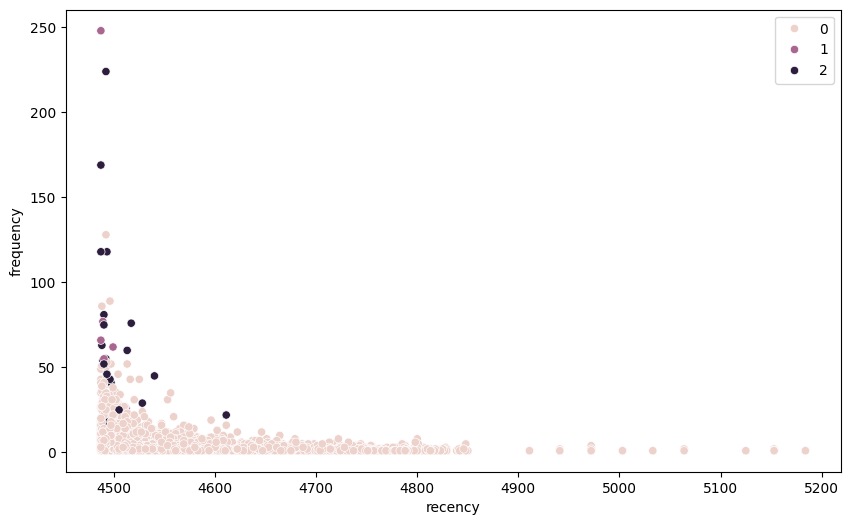

In [23]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=km.labels_)
plt.show()

In [24]:
# Profiles of customers
X['label'] = km.labels_

In [25]:
for k in range(3):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
           recency    frequency         sales
count  4338.000000  4338.000000   4338.000000
mean   4588.662517     4.618949   1386.300388
min    4487.000000     1.000000  -4287.630000
max    5184.000000   128.000000  21535.900000



cluster nb : 1
       recency  frequency          sales
count      6.0        6.0       6.000000
mean    4494.0       89.0  182181.981667
min     4487.0       26.0  113384.140000
max     4512.0      248.0  279489.020000



cluster nb : 2
           recency   frequency         sales
count    28.000000   28.000000     28.000000
mean   4503.535714   57.821429  42614.387143
min    4487.000000   14.000000  25748.350000
max    4611.000000  224.000000  88125.380000





In [26]:

from scipy.cluster.hierarchy import dendrogram, linkage



{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [42.5, 42.5, 73.75, 73.75],
  [12.5, 12.5, 58.125, 58.125],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [113.75, 113.75, 153.75, 153.75],
  [35.3125, 35.3125, 133.75, 133.75],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [192.5, 192.5, 230.0, 230.0],
  [84.53125, 84.53125, 211.25, 211.25]],
 'dcoord': [[0.0, 110.34382628856045, 110.34382628856045, 0.0],
  [0.0, 292.0432517624745, 292.0432517624745, 110.34382628856045],
  [0.0, 23.51518870857726, 23.51518870857726, 0.0],
  [0.0, 66.57392958208193, 66.57392958208193, 23.515

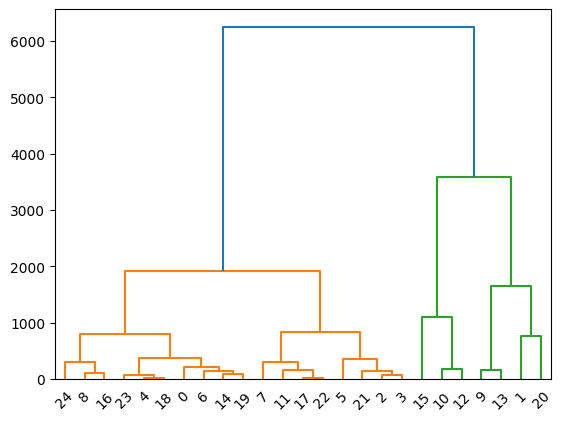

In [27]:
linkage_data = linkage(data_cluster.drop('CustomerID',axis=1).head(25), method='complete', metric='euclidean')
dendrogram(linkage_data)

In [33]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=4,metric='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(data_cluster)

In [34]:
pd.Series(labels).unique()

array([1, 0, 3, 2], dtype=int64)

In [35]:
# Profiles of customers
X['label2'] = labels
